In [1]:
'''
    This script performs statiscal analysis based on 
    CCI prediction result by CellPhoneDD.
'''

'\n    This script performs statiscal analysis based on \n    CCI prediction result by CellPhoneDD.\n'

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
from math import floor
from glob import glob 
import numpy as np

rcParams["font.size"] = 14
rcParams["font.family"] = 'arial'

In [3]:
# Import the CCI prediction result
df = pd.read_csv("/path/to/EB/statistical_analysis_pvalues_11_21_2023_094654.txt", sep="\t")
df

,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,...,pDC|PB,pDC|PC,pDC|Pre B,pDC|Pre-pro B,pDC|Pro B,pDC|Pro-myelocyte,pDC|S100A8hi immature B,pDC|Treg,pDC|cDC,pDC|pDC
0,CPI-SC0A2DB962D,CDH1_integrin_a2b1_complex,simple:P12830,complex:integrin_a2b1_complex,CDH1,NaN,False,False,False,curated,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,CPI-SC0B5CEA47D,COL10A1_integrin_a2b1_complex,simple:Q03692,complex:integrin_a2b1_complex,COL10A1,NaN,True,False,False,curated,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,CPI-SC0C8B7BCBB,COL11A1_integrin_a2b1_complex,simple:P12107,complex:integrin_a2b1_complex,COL11A1,NaN,True,False,False,curated,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,CPI-SC0D3C12C3F,COL11A2_integrin_a2b1_complex,simple:P13942,complex:integrin_a2b1_complex,COL11A2,NaN,True,False,False,curated,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,CPI-SC0B86B7CED,COL12A1_integrin_a2b1_complex,simple:Q99715,complex:integrin_a2b1_complex,COL12A1,NaN,True,False,False,curated,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,CPI-SS07D508428,SIGLEC15_CD44,simple:Q6ZMC9,simple:P16070,SIGLEC15,CD44,False,False,True,curated,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2362,CPI-SS02A170A99,SPN_SIGLEC1,simple:P16150,simple:Q9BZZ2,SPN,SIGLEC1,True,False,False,curated,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2363,CPI-SS0DC2DD9D7,THPO_MPL,simple:P40225,simple:P40238,THPO,MPL,True,False,True,curated,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2364,CPI-SS00F69C501,TRH_TRHR,simple:P20396,simple:P34981,TRH,TRHR,True,False,True,curated,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [4]:
# Define cell type categories for later use

In [5]:
b_lst = ["Pre-pro B", "Cycling pro B", "Pro B", "Cycling pre B", "Pre B", 
            "Immature B", "FTLhi immature B", "S100A8hi immature B", 
            "Naive B", "FOShi naive B", "HSPA1Ahi naive B", 
            "LZ GC B", "DZ GC B",
            "Classical memory B", "IgM+ memory B", "CD27-IgM+IgD+ memory B", "PB", "PC"]
nb_lst = ["HSC", "CMP", "GMP", "MEP", "CLP",
         "CD4+ T", "CD8+ T", "MAIT", "gd T", "Treg", "NK",
         "CD14+ monocyte", "CD16+ monocyte", "Macrophage", "cDC", "pDC",
             "Pro-myelocyte", "Myelocyte", "Myeloblast", "Neutrophil",
         "Erythroblast", "Erythrocyte", "Megakaryocyte",
         "MSC"]
hspc_lst = ["HSC", "CMP", "GMP", "MEP", "CLP"]
t_lst = ["CD4+ T", "CD8+ T", "MAIT", "gd T", "Treg", "NK"]
mye_lst = ["CD4+ T", "CD8+ T", "MAIT", "gd T", "Treg", "NK", "CD14+ monocyte", "CD16+ monocyte", "Macrophage", "cDC", "pDC"]
ery_lst = ["Erythroblast", "Erythrocyte", "Megakaryocyte"]
msc_lst = ["MSC"]

In [6]:
eb_b_lst = ["Pre-pro B", "Cycling pro B", "Pro B", "Cycling pre B", "Pre B", 
            "Immature B", "FTLhi immature B", "S100A8hi immature B", 
            "Naive B", "FOShi naive B", 
            "Classical memory B", "IgM+ memory B", "CD27-IgM+IgD+ memory B", "PB", "PC"]
eb_nb_lst = ["HSC", "CMP", "GMP", "MEP", "CLP",
         "CD4+ T", "CD8+ T", "MAIT", "Treg", "NK",
         "CD14+ monocyte", "CD16+ monocyte", "Macrophage", "cDC", "pDC",
             "Pro-myelocyte", "Myelocyte", "Myeloblast", "Neutrophil",
         "Erythroblast", "Erythrocyte", "Megakaryocyte",
         "MSC"]

pb_b_lst = [ "Naive B", "FOShi naive B",
            "Classical memory B", "IgM+ memory B", "CD27-IgM+IgD+ memory B", "PC"]
pb_nb_lst = [
         "CD4+ T", "CD8+ T", "MAIT", "gd T", "Treg", "NK",
         "CD14+ monocyte", "CD16+ monocyte", "Macrophage", "cDC", "pDC",
              "Neutrophil", "Megakaryocyte"]

gc_b_lst = ["Naive B", "FOShi naive B", "HSPA1Ahi naive B", 
            "LZ GC B", "DZ GC B",
            "Classical memory B", "IgM+ memory B", "CD27-IgM+IgD+ memory B", "PB"]
gc_nb_lst = [
         "CD4+ T", "CD8+ T", "Treg", "NK",
         "CD14+ monocyte", "Macrophage", "cDC", "pDC"]

In [7]:
rowcolors = pd.DataFrame({"CellType": ["#e7dfd5", "#d04925", "#84a9ac", "#992e24", "#3b6978", 
  "#62cdff", "#97deff", "#c9eeff", "#14c38e", "#b8f1b0", "#e3fcbf", 
  "#f9c5d5", "#f2789f", "#40128b", "#9336b4", 
  "#dd58d6", "#f6ba6f", "#f9d923"]}, index=b_lst)
colcolors = pd.DataFrame({"CellType": ["#1f77b4"]*5 + ["#ff7f0e"] * 6 + ["#2ca02c"] * 9 + ["#d62728"]*3 + ["#8c564b"]},
                        index=nb_lst)

In [8]:
############################################################
#  Visualize the top 20 signaling categories 
#  in three tissue source
############################################################

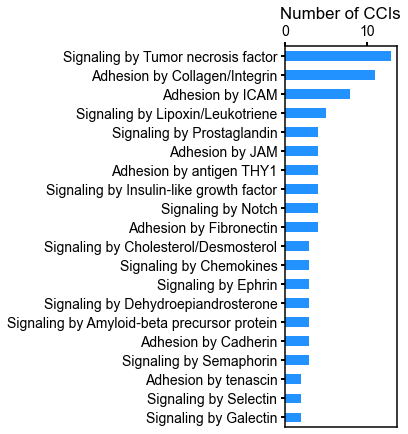

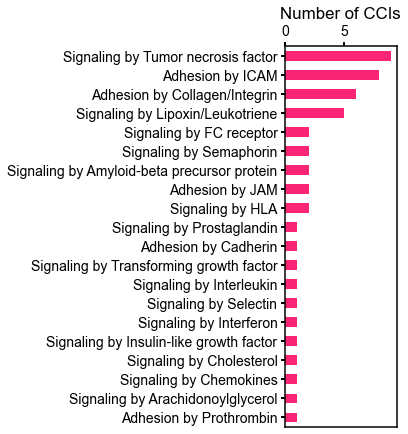

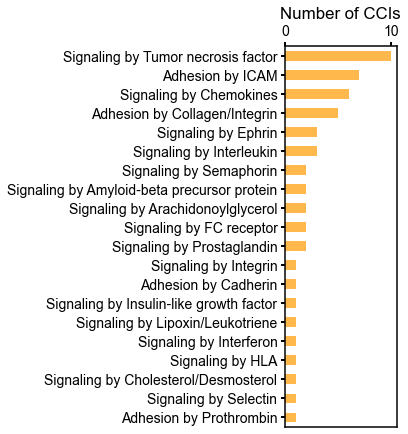

In [9]:
df = pd.read_csv("/path/to/EB/statistical_analysis_pvalues_11_21_2023_094654.txt", sep="\t")
cp1 = ["%s|%s"%(x, y) for x in eb_b_lst for y in eb_nb_lst]
cp2 = ["%s|%s"%(y, x) for x in eb_b_lst for y in eb_nb_lst]

df_temp1 = df[(df.receptor_a==True) & (df.receptor_b==False)]
df_temp1 = df_temp1[(df_temp1.loc[:,cp1]<0.05).sum(axis=1)>0]
df_temp2 = df[(df.receptor_a==False) & (df.receptor_b==True)]
df_temp2 = df_temp2[(df_temp2.loc[:,cp2]<0.05).sum(axis=1)>0]
df_temp3 = df[(df.directionality=="Adhesion-Adhesion") | df.classification.str.contains("Adhesion")]
df_temp3 = df_temp3[(df_temp3.loc[:,cp1+cp2]<0.05).sum(axis=1)>0]
set_eb_2 = pd.concat([df_temp1,df_temp2, df_temp3])["classification"].value_counts()[:20].index.tolist()

fig, ax = plt.subplots(figsize=(2,7))
pd.concat([df_temp1,df_temp2, df_temp3]).drop_duplicates()["classification"].value_counts()[:20][::-1].plot.barh(ax=ax, color="#2192ff")
ax.set_title("Number of CCIs")
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False, 
               left=True, labelleft=True, right=False, labelright=False)


df = pd.read_csv("/path/to/PBMC/statistical_analysis_pvalues_11_20_2023_202338.txt", sep="\t")
cp1 = ["%s|%s"%(x, y) for x in pb_b_lst for y in pb_nb_lst]
cp2 = ["%s|%s"%(y, x) for x in pb_b_lst for y in pb_nb_lst]

df_temp1 = df[(df.receptor_a==True) & (df.receptor_b==False)]
df_temp1 = df_temp1[(df_temp1.loc[:,cp1]<0.05).sum(axis=1)>0]
df_temp2 = df[(df.receptor_a==False) & (df.receptor_b==True)]
df_temp2 = df_temp2[(df_temp2.loc[:,cp2]<0.05).sum(axis=1)>0]
df_temp3 = df[(df.directionality=="Adhesion-Adhesion") | df.classification.str.contains("Adhesion")]
df_temp3 = df_temp3[(df_temp3.loc[:,cp1+cp2]<0.05).sum(axis=1)>0]
set_pb_2 = pd.concat([df_temp1,df_temp2, df_temp3])["classification"].value_counts()[:20].index.tolist()

fig, ax = plt.subplots(figsize=(2,7))
pd.concat([df_temp1,df_temp2, df_temp3]).drop_duplicates()["classification"].value_counts()[:20][::-1].plot.barh(ax=ax, color="#fb2576")
#ax.set_xlim(0,10)
ax.set_title("Number of CCIs")
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False, 
               left=True, labelleft=True, right=False, labelright=False)


df = pd.read_csv("/path/to/GC/statistical_analysis_pvalues_11_20_2023_205114.txt", sep="\t")
cp1 = ["%s|%s"%(x, y) for x in gc_b_lst for y in gc_nb_lst]
cp2 = ["%s|%s"%(y, x) for x in gc_b_lst for y in gc_nb_lst]

df_temp1 = df[(df.receptor_a==True) & (df.receptor_b==False)]
df_temp1 = df_temp1[(df_temp1.loc[:,cp1]<0.05).sum(axis=1)>0]
df_temp2 = df[(df.receptor_a==False) & (df.receptor_b==True)]
df_temp2 = df_temp2[(df_temp2.loc[:,cp2]<0.05).sum(axis=1)>0]
df_temp3 = df[(df.directionality=="Adhesion-Adhesion") | df.classification.str.contains("Adhesion")]
df_temp3 = df_temp3[(df_temp3.loc[:,cp1+cp2]<0.05).sum(axis=1)>0]
set_gc_2 = pd.concat([df_temp1,df_temp2, df_temp3])["classification"].value_counts()[:20].index.tolist()

fig, ax = plt.subplots(figsize=(2,7))
pd.concat([df_temp1,df_temp2, df_temp3]).drop_duplicates()["classification"].value_counts()[:20][::-1].plot.barh(ax=ax, color="#ffb84c")
#ax.set_xlim(0,10)
ax.set_title("Number of CCIs")
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)
#ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False, 
#               left=False, labelleft=False, right=True, labelright=True)
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False, 
               left=True, labelleft=True, right=False, labelright=False)

In [10]:
############################################################
#    Comparison of the predicted signaling pathways 
#    between different tissue sources
############################################################

In [11]:
df = pd.read_csv("/path/to/EB/statistical_analysis_pvalues_11_21_2023_094654.txt", sep="\t")
cp1 = ["%s|%s"%(x, y) for x in eb_b_lst for y in eb_nb_lst]
cp2 = ["%s|%s"%(y, x) for x in eb_b_lst for y in eb_nb_lst]
df_temp1 = df[(df.receptor_a==True) & (df.receptor_b==False)]
df_temp1 = df_temp1[(df_temp1.loc[:,cp1]<0.05).sum(axis=1)>0]
df_temp2 = df[(df.receptor_a==False) & (df.receptor_b==True)]
df_temp2 = df_temp2[(df_temp2.loc[:,cp2]<0.05).sum(axis=1)>0]
df_temp3 = df[df.classification.str.contains("Adhesion").fillna(False)]
df_temp3 = df_temp3[(df_temp3.loc[:,cp1+cp2]<0.05).sum(axis=1)>0]
s_eb = pd.concat([df_temp1,df_temp2, df_temp3]).drop_duplicates()["classification"].value_counts(normalize=True)

df = pd.read_csv("/path/to/PBMC/statistical_analysis_pvalues_11_20_2023_202338.txt", sep="\t")
cp1 = ["%s|%s"%(x, y) for x in pb_b_lst for y in pb_nb_lst]
cp2 = ["%s|%s"%(y, x) for x in pb_b_lst for y in pb_nb_lst]
df_temp1 = df[(df.receptor_a==True) & (df.receptor_b==False)]
df_temp1 = df_temp1[(df_temp1.loc[:,cp1]<0.05).sum(axis=1)>0]
df_temp2 = df[(df.receptor_a==False) & (df.receptor_b==True)]
df_temp2 = df_temp2[(df_temp2.loc[:,cp2]<0.05).sum(axis=1)>0]
df_temp3 = df[df.classification.str.contains("Adhesion").fillna(False)]
df_temp3 = df_temp3[(df_temp3.loc[:,cp1+cp2]<0.05).sum(axis=1)>0]
s_pb = pd.concat([df_temp1,df_temp2, df_temp3]).drop_duplicates()["classification"].value_counts(normalize=True)


df = pd.read_csv("/path/to/GC/statistical_analysis_pvalues_11_20_2023_205114.txt", sep="\t")
cp1 = ["%s|%s"%(x, y) for x in gc_b_lst for y in gc_nb_lst]
cp2 = ["%s|%s"%(y, x) for x in gc_b_lst for y in gc_nb_lst]
df_temp1 = df[(df.receptor_a==True) & (df.receptor_b==False)]
df_temp1 = df_temp1[(df_temp1.loc[:,cp1]<0.05).sum(axis=1)>0]
df_temp2 = df[(df.receptor_a==False) & (df.receptor_b==True)]
df_temp2 = df_temp2[(df_temp2.loc[:,cp2]<0.05).sum(axis=1)>0]
df_temp3 = df[df.classification.str.contains("Adhesion").fillna(False)]
df_temp3 = df_temp3[(df_temp3.loc[:,cp1+cp2]<0.05).sum(axis=1)>0]
s_gc = pd.concat([df_temp1,df_temp2, df_temp3]).drop_duplicates()["classification"].value_counts(normalize=True)


df_sign = pd.concat([s_eb, s_gc, s_pb], axis=1)
df_sign.columns = ["BM", "GC", "PB"]
df_sign


,BM,GC,PB
Signaling by Tumor necrosis factor,0.105263,0.188679,0.166667
Adhesion by Collagen/Integrin,0.096491,0.094340,0.125000
Adhesion by ICAM,0.070175,0.132075,0.166667
Signaling by Lipoxin/Leukotriene,0.043860,0.018868,0.104167
Signaling by Prostaglandin,0.035088,0.037736,0.020833
Adhesion by JAM,0.035088,NaN,0.041667
Adhesion by antigen THY1,0.035088,NaN,NaN
Signaling by Insulin-like growth factor,0.035088,0.018868,0.020833
Signaling by Notch,0.035088,NaN,NaN
Adhesion by Fibronectin,0.035088,NaN,NaN


In [12]:
# Set the order of signaling pathway
# first tissue-specific
# then frequency

bm_specific_signaling = df_sign[df_sign.PB.isna() & df_sign.GC.isna()].index.tolist()
#gc_specific_signaling = df_sign[df_sign.PB.isna() & df_sign.BM.isna()].index.tolist()

bm_frequent_signaling = df_sign[df_sign.BM.notna() & (df_sign.PB.notna() | df_sign.GC.notna())][df_sign[df_sign.BM.notna() & (df_sign.PB.notna() | df_sign.GC.notna())].fillna(0).apply(lambda x:x.BM>x.PB and x.BM>x.GC, axis=1)].sort_values("BM", ascending=False).index.tolist()
pb_frequent_signaling = df_sign[df_sign.PB.notna() & (df_sign.BM.notna() | df_sign.GC.notna())][df_sign[df_sign.PB.notna() & (df_sign.BM.notna() | df_sign.GC.notna())].fillna(0).apply(lambda x:x.PB>x.BM and x.PB>x.GC, axis=1)].sort_values("PB", ascending=False).index.tolist()
gc_frequent_signaling = df_sign[df_sign.GC.notna() & (df_sign.PB.notna() | df_sign.BM.notna())][df_sign[df_sign.GC.notna() & (df_sign.PB.notna() | df_sign.BM.notna())].fillna(0).apply(lambda x:x.GC>x.PB and x.GC>x.BM, axis=1)].sort_values("GC", ascending=False).index.tolist()
frequent_signaling = bm_frequent_signaling + gc_frequent_signaling + pb_frequent_signaling

ordered_signaling = bm_specific_signaling +  bm_frequent_signaling + gc_frequent_signaling + pb_frequent_signaling
print (len(ordered_signaling))

41


In [13]:
df_sign_ordered = df_sign.loc[ordered_signaling,:]
df_sign_ordered["X"] = range(df_sign_ordered.shape[0])
df_sign_ordered

,BM,GC,PB,X
Adhesion by antigen THY1,0.035088,NaN,NaN,0
Signaling by Notch,0.035088,NaN,NaN,1
Adhesion by Fibronectin,0.035088,NaN,NaN,2
Signaling by Dehydroepiandrosterone,0.026316,NaN,NaN,3
Adhesion by tenascin,0.017544,NaN,NaN,4
Signaling by Galectin,0.017544,NaN,NaN,5
Signaling by Plasminogen Activator,0.017544,NaN,NaN,6
Signaling by R-spondin,0.017544,NaN,NaN,7
Adhesion by VCAM,0.017544,NaN,NaN,8
Signaling by Transferrin,0.008772,NaN,NaN,9


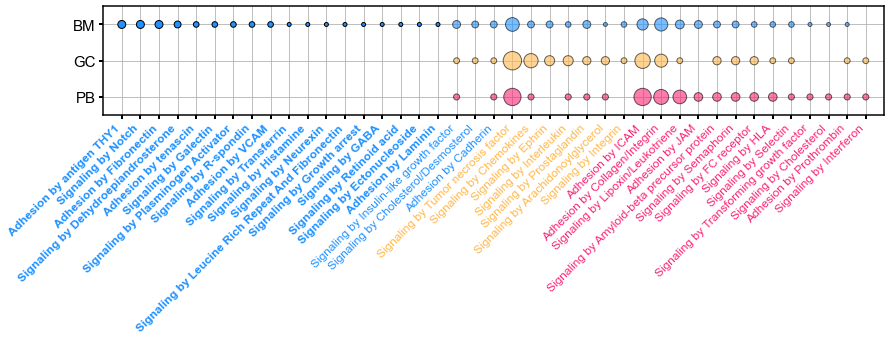

In [14]:
fig, ax = plt.subplots(figsize=(14,2))

size_factor = 1800
edgecolor = "black"
alpha = 0.6
ax.grid(zorder=0)


#####################################################
#             Specific signaling plot
#####################################################
size_lst = [x*size_factor for x in df_sign.loc[bm_specific_signaling,"BM"].tolist()]
xs = list(range(len(bm_specific_signaling)))
ys = [2] * len(bm_specific_signaling)
ax.scatter(xs, ys, size_lst, color="#2192ff", zorder=2, edgecolor=edgecolor)

#size_lst = [x*size_factor for x in df_sign.loc[gc_specific_signaling,"GC"].tolist()]
#xs = [max(xs)+1+x for x in list(range(len(gc_specific_signaling)))]
#ys = [0] * len(gc_specific_signaling)
#ax.scatter(xs, ys, size_lst, color="#ffb84c", zorder=2, edgecolor=edgecolor)


#####################################################
#             Frequent signaling plot
#####################################################
size_lst = [x*size_factor for x in df_sign_ordered.loc[df_sign_ordered.BM.notna() & df_sign_ordered.index.isin(frequent_signaling)]["BM"].tolist()]
xs = df_sign_ordered.loc[df_sign_ordered.BM.notna() & df_sign_ordered.index.isin(frequent_signaling)]["X"].tolist()
ys = [2] * len(size_lst)
ax.scatter(xs, ys, size_lst, color="#2192ff", zorder=2, edgecolor=edgecolor, alpha=alpha)

size_lst = [x*size_factor for x in df_sign_ordered.loc[df_sign_ordered.GC.notna() & df_sign_ordered.index.isin(frequent_signaling)]["GC"].tolist()]
xs = df_sign_ordered.loc[df_sign_ordered.GC.notna() & df_sign_ordered.index.isin(frequent_signaling)]["X"].tolist()
ys = [1] * len(size_lst)
ax.scatter(xs, ys, size_lst, color="#ffb84c", zorder=2, edgecolor=edgecolor, alpha=alpha)

size_lst = [x*size_factor for x in df_sign_ordered.loc[df_sign_ordered.PB.notna() & df_sign_ordered.index.isin(frequent_signaling)]["PB"].tolist()]
xs = df_sign_ordered.loc[df_sign_ordered.PB.notna() & df_sign_ordered.index.isin(frequent_signaling)]["X"].tolist()
ys = [0] * len(size_lst)
ax.scatter(xs, ys, size_lst, color="#fb2576", zorder=2, edgecolor=edgecolor, alpha=alpha)


ax.set_ylim(-0.5,2.5)
ax.set_yticks([0,1,2], ["PB", "GC", "BM"], fontsize=15)
ax.set_xticks(range(df_sign.shape[0]), ordered_signaling, rotation=45, ha="right", fontsize=12)
ax.set_xlim(-1, 41)


#####################################################
#                   Aesthetics
#####################################################
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)

colors = ["#2192ff"] * len(bm_specific_signaling) + ["#2192ff"] * len(bm_frequent_signaling) + ["#ffb84c"] * len(gc_frequent_signaling) + ["#fb2576"] * len(pb_frequent_signaling)
for i, (xtick, color) in enumerate(zip(ax.get_xticklabels(), colors)):
    xtick.set_color(color)
    if i < len(bm_specific_signaling):
        xtick.set_fontweight("bold")


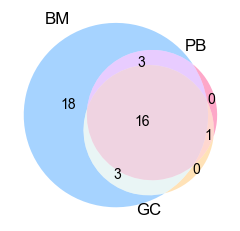

In [15]:
# Investigate the significant CCI overlappings between three dataset

from matplotlib_venn import venn3, venn2

df = pd.read_csv("/path/to/EB/statistical_analysis_pvalues_11_21_2023_094654.txt", sep="\t")
cp1 = ["%s|%s"%(x, y) for x in eb_b_lst for y in eb_nb_lst]
cp2 = ["%s|%s"%(y, x) for x in eb_b_lst for y in eb_nb_lst]
df_temp1 = df[(df.receptor_a==True) & (df.receptor_b==False)]
df_temp1 = df_temp1[(df_temp1.loc[:,cp1]<0.05).sum(axis=1)>0]
df_temp2 = df[(df.receptor_a==False) & (df.receptor_b==True)]
df_temp2 = df_temp2[(df_temp2.loc[:,cp2]<0.05).sum(axis=1)>0]
df_temp3 = df[(df.directionality=="Adhesion-Adhesion") | df.classification.str.contains("Adhesion")]
df_temp3 = df_temp3[(df_temp3.loc[:,cp1+cp2]<0.05).sum(axis=1)>0]
set_eb = set(pd.concat([df_temp1,df_temp2, df_temp3])["classification"].dropna().tolist())


df = pd.read_csv("/path/to/PBMC/statistical_analysis_pvalues_11_20_2023_202338.txt", sep="\t")
cp1 = ["%s|%s"%(x, y) for x in pb_b_lst for y in pb_nb_lst]
cp2 = ["%s|%s"%(y, x) for x in pb_b_lst for y in pb_nb_lst]
df_temp1 = df[(df.receptor_a==True) & (df.receptor_b==False)]
df_temp1 = df_temp1[(df_temp1.loc[:,cp1]<0.05).sum(axis=1)>0]
df_temp2 = df[(df.receptor_a==False) & (df.receptor_b==True)]
df_temp2 = df_temp2[(df_temp2.loc[:,cp2]<0.05).sum(axis=1)>0]
df_temp3 = df[(df.directionality=="Adhesion-Adhesion") | df.classification.str.contains("Adhesion")]
df_temp3 = df_temp3[(df_temp3.loc[:,cp1+cp2]<0.05).sum(axis=1)>0]
set_pb = set(pd.concat([df_temp1,df_temp2, df_temp3])["classification"].dropna().tolist())

df = pd.read_csv("/path/to/GC/statistical_analysis_pvalues_11_20_2023_205114.txt", sep="\t")
cp1 = ["%s|%s"%(x, y) for x in gc_b_lst for y in gc_nb_lst]
cp2 = ["%s|%s"%(y, x) for x in gc_b_lst for y in gc_nb_lst]
df_temp1 = df[(df.receptor_a==True) & (df.receptor_b==False)]
df_temp1 = df_temp1[(df_temp1.loc[:,cp1]<0.05).sum(axis=1)>0]
df_temp2 = df[(df.receptor_a==False) & (df.receptor_b==True)]
df_temp2 = df_temp2[(df_temp2.loc[:,cp2]<0.05).sum(axis=1)>0]
df_temp3 = df[(df.directionality=="Adhesion-Adhesion") | df.classification.str.contains("Adhesion")]
df_temp3 = df_temp3[(df_temp3.loc[:,cp1+cp2]<0.05).sum(axis=1)>0]
set_gc = set(pd.concat([df_temp1,df_temp2, df_temp3])["classification"].dropna().tolist())

venn3([set_eb, set_pb, set_gc], set_labels=["BM", "PB", "GC"], set_colors=('#2192ff', '#fb2576', '#ffb84c'))

In [16]:
############################################################
#  Top 5 signaling categories across B cell subpopulations
############################################################

In [17]:
df = pd.read_csv("/path/to/EB/statistical_analysis_pvalues_11_21_2023_094654.txt", sep="\t")

def signaling_count_for_lineage(bc):
    
    
    cp1 = ["%s|%s"%(bc, y) for y in eb_nb_lst]
    cp2 = ["%s|%s"%(y, bc) for y in eb_nb_lst]
    df_temp1 = df[(df.receptor_a==True) & (df.receptor_b==False)]
    df_temp1 = df_temp1[(df_temp1.loc[:,cp1]<0.05).sum(axis=1)>0]
    df_temp2 = df[(df.receptor_a==False) & (df.receptor_b==True)]
    df_temp2 = df_temp2[(df_temp2.loc[:,cp2]<0.05).sum(axis=1)>0]
    df_temp3 = df[(df.directionality=="Adhesion-Adhesion") | df.classification.str.contains("Adhesion")]
    df_temp3 = df_temp3[(df_temp3.loc[:,cp1+cp2]<0.05).sum(axis=1)>0]
    
    signaling_count = pd.concat([df_temp1,df_temp2, df_temp3]).drop_duplicates()["classification"].dropna().value_counts()
    
    return signaling_count

for i, bc in enumerate(eb_b_lst):
    df_temp = signaling_count_for_lineage(bc).rename(bc).to_frame()
    if i == 0:
        dF = df_temp
    else:
        dF = pd.concat([dF, df_temp], axis=1)

dF = dF.fillna(0).astype("int")
dF

,Pre-pro B,Cycling pro B,Pro B,Cycling pre B,Pre B,Immature B,FTLhi immature B,S100A8hi immature B,Naive B,FOShi naive B,Classical memory B,IgM+ memory B,CD27-IgM+IgD+ memory B,PB,PC
Signaling by Insulin-like growth factor,4,4,2,2,2,0,2,1,2,2,2,2,2,1,2
Adhesion by ICAM,3,6,3,6,7,1,2,1,2,2,7,8,6,2,8
Signaling by Amyloid-beta precursor protein,3,3,3,3,2,1,2,2,2,2,1,1,2,1,1
Signaling by Semaphorin,3,3,0,2,0,0,1,0,1,1,2,2,2,0,2
Adhesion by antigen THY1,2,2,2,0,0,0,1,1,0,1,3,2,2,0,1
Adhesion by Fibronectin,2,2,2,1,1,0,2,1,1,1,2,2,2,2,3
Signaling by Tumor necrosis factor,2,4,3,1,3,2,4,2,5,3,8,8,7,6,9
Signaling by Integrin,2,2,2,0,0,0,1,1,0,1,1,1,1,0,1
Signaling by Notch,2,2,0,0,1,2,2,2,2,2,2,2,2,0,0
Signaling by HLA,1,0,2,0,0,0,1,0,1,0,1,1,2,0,1


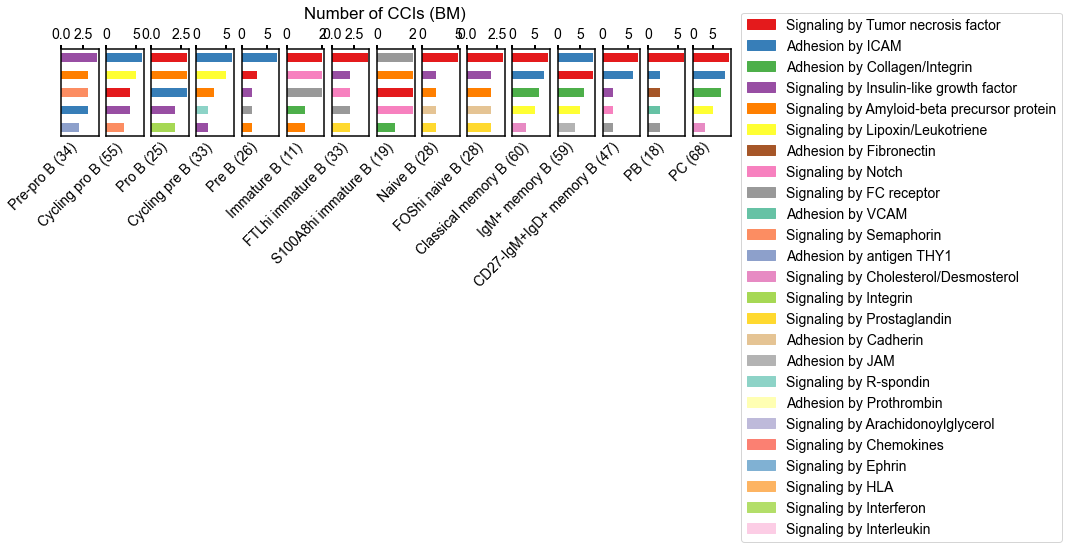

In [18]:
fig, axes = plt.subplots(1, 15, figsize=(12, 2.1))

signaling_order = dF.sum(axis=1).sort_values(ascending=False).index.tolist()
signaling_lst = []
for i, bc in enumerate(eb_b_lst):
    #print (bc, dF.loc[:,bc].sort_values(ascending=False)[:5].index.tolist())
    signaling_lst += dF.loc[:,bc].sort_values(ascending=False)[:5].index.tolist()

# order the signaling list
signaling_lst = [x for x in signaling_order if x in signaling_lst]
signaling_lst_eb = signaling_lst

# Generate color scheme
signaling_in_gc_pb = ['Adhesion by Prothrombin',
 'Signaling by Arachidonoylglycerol',
 'Signaling by Chemokines',
 'Signaling by Ephrin',
 'Signaling by HLA',
 'Signaling by Interferon',
 'Signaling by Interleukin']
color_lst = list(sns.color_palette("Set1")) + list(sns.color_palette("Set2")) + list(sns.color_palette("Set3"))
color_dict = dict(zip(signaling_lst+signaling_in_gc_pb, color_lst[:len(signaling_lst+signaling_in_gc_pb)]))

# Plot the barplot
for i, bc in enumerate(eb_b_lst):
    s_lst = dF.loc[:,bc].sort_values(ascending=False)[:5].index.tolist()
    #ax = (dF.loc[:,bc]/dF.loc[:,bc].sum()).sort_values(ascending=False)[:5][::-1].plot.barh(ax=axes[i], color=[ color_dict[x] for x in s_lst][::-1])
    ax = dF.loc[:,bc].sort_values(ascending=False)[:5][::-1].plot.barh(ax=axes[i], color=[ color_dict[x] for x in s_lst][::-1])
    ax.xaxis.set_tick_params(width=2, length=4)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)
    ax.set_yticklabels([""]*5)
    ax.set_xlabel("%s (%d)"%(bc, dF.loc[:,bc].sum()), rotation=45, ha="right")
    ax.set_ylabel("")
    ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False, 
               left=False, labelleft=False, right=False, labelright=False)


from matplotlib.patches import Patch

legend_elements = []
for s in signaling_lst+signaling_in_gc_pb:
    legend_elements += [ Patch(facecolor=color_dict[s], edgecolor=color_dict[s], label=s) ]

# Create the figure
plt.legend(handles=legend_elements, bbox_to_anchor=(1.1, 1, 0.5, 0.5))
fig.suptitle('Number of CCIs (BM)')
fig.subplots_adjust(top=0.7)

In [19]:
df = pd.read_csv("/path/to/GC/statistical_analysis_pvalues_11_20_2023_205114.txt", sep="\t")

def signaling_count_for_lineage(bc):
    
    
    cp1 = ["%s|%s"%(bc, y) for y in gc_nb_lst]
    cp2 = ["%s|%s"%(y, bc) for y in gc_nb_lst]
    df_temp1 = df[(df.receptor_a==True) & (df.receptor_b==False)]
    df_temp1 = df_temp1[(df_temp1.loc[:,cp1]<0.05).sum(axis=1)>0]
    df_temp2 = df[(df.receptor_a==False) & (df.receptor_b==True)]
    df_temp2 = df_temp2[(df_temp2.loc[:,cp2]<0.05).sum(axis=1)>0]
    df_temp3 = df[(df.directionality=="Adhesion-Adhesion") | df.classification.str.contains("Adhesion")]
    df_temp3 = df_temp3[(df_temp3.loc[:,cp1+cp2]<0.05).sum(axis=1)>0]
    
    #signaling_count = pd.concat([df_temp1,df_temp2, df_temp3]).drop_duplicates()["classification"].fillna("Missing").value_counts()
    signaling_count = pd.concat([df_temp1,df_temp2, df_temp3]).drop_duplicates()["classification"].dropna().value_counts()
    
    return signaling_count

for i, bc in enumerate(gc_b_lst):
    df_temp = signaling_count_for_lineage(bc).rename(bc).to_frame()
    if i == 0:
        dF = df_temp
    else:
        dF = pd.concat([dF, df_temp], axis=1)

dF = dF.fillna(0).astype("int")
dF

,Naive B,FOShi naive B,HSPA1Ahi naive B,LZ GC B,DZ GC B,Classical memory B,IgM+ memory B,CD27-IgM+IgD+ memory B,PB
Signaling by Tumor necrosis factor,5,3,5,4,3,9,8,7,5
Adhesion by ICAM,4,7,2,4,7,5,4,7,4
Signaling by Chemokines,3,3,3,1,1,6,3,5,0
Signaling by FC receptor,2,2,2,2,0,2,2,2,0
Signaling by Amyloid-beta precursor protein,2,2,2,2,2,2,2,2,1
Signaling by Prostaglandin,2,2,2,0,0,0,2,2,0
Signaling by Semaphorin,1,0,1,1,1,1,1,2,1
Signaling by Arachidonoylglycerol,1,1,0,1,1,1,1,1,1
Signaling by Cholesterol/Desmosterol,1,1,1,1,1,0,1,1,1
Signaling by HLA,1,1,1,1,1,0,1,1,1


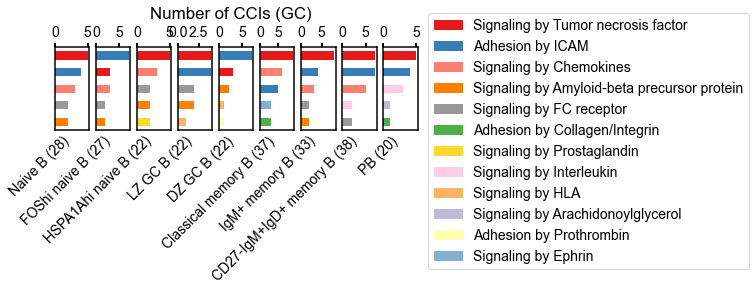

In [20]:
fig, axes = plt.subplots(1, 9, figsize=(6.5, 2))

signaling_order = dF.sum(axis=1).sort_values(ascending=False).index.tolist()
signaling_lst = []
for i, bc in enumerate(gc_b_lst):
    #print (bc, dF.loc[:,bc].sort_values(ascending=False)[:5].index.tolist())
    signaling_lst += dF.loc[:,bc].sort_values(ascending=False)[:5].index.tolist()

# order the signaling list
signaling_lst = [x for x in signaling_order if x in signaling_lst]
signaling_lst_gc = signaling_lst

# Plot the barplot
for i, bc in enumerate(gc_b_lst):
    s_lst = dF.loc[:,bc].sort_values(ascending=False)[:5].index.tolist()
    ax = dF.loc[:,bc].sort_values(ascending=False)[:5][::-1].plot.barh(ax=axes[i], color=[ color_dict[x] for x in s_lst][::-1])
    ax.xaxis.set_tick_params(width=2, length=4)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)
    ax.set_yticklabels([""]*5)
    ax.set_xlabel("%s (%d)"%(bc, dF.loc[:,bc].sum()), rotation=45, ha="right")
    ax.set_ylabel("")
    ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False, 
               left=False, labelleft=False, right=False, labelright=False)

from matplotlib.patches import Patch

legend_elements = []
for s in signaling_lst:
    legend_elements += [ Patch(facecolor=color_dict[s], edgecolor=color_dict[s], label=s) ]

# Create the figure
plt.legend(handles=legend_elements, bbox_to_anchor=(1.1, 1, 0.5, 0.5))
fig.suptitle('Number of CCIs (GC)')
fig.subplots_adjust(top=0.7)


In [21]:
df = pd.read_csv("/path/to/PBMC/statistical_analysis_pvalues_11_20_2023_202338.txt", sep="\t")

def signaling_count_for_lineage(bc):
    
    
    cp1 = ["%s|%s"%(bc, y) for y in pb_nb_lst]
    cp2 = ["%s|%s"%(y, bc) for y in pb_nb_lst]
    df_temp1 = df[(df.receptor_a==True) & (df.receptor_b==False)]
    df_temp1 = df_temp1[(df_temp1.loc[:,cp1]<0.05).sum(axis=1)>0]
    df_temp2 = df[(df.receptor_a==False) & (df.receptor_b==True)]
    df_temp2 = df_temp2[(df_temp2.loc[:,cp2]<0.05).sum(axis=1)>0]
    df_temp3 = df[(df.directionality=="Adhesion-Adhesion") | df.classification.str.contains("Adhesion")]
    df_temp3 = df_temp3[(df_temp3.loc[:,cp1+cp2]<0.05).sum(axis=1)>0]
    
    #signaling_count = pd.concat([df_temp1,df_temp2, df_temp3]).drop_duplicates()["classification"].fillna("Missing").value_counts()
    signaling_count = pd.concat([df_temp1,df_temp2, df_temp3]).drop_duplicates()["classification"].dropna().value_counts()
    
    return signaling_count

for i, bc in enumerate(pb_b_lst):
    df_temp = signaling_count_for_lineage(bc).rename(bc).to_frame()
    if i == 0:
        dF = df_temp
    else:
        dF = pd.concat([dF, df_temp], axis=1)

dF = dF.fillna(0).astype("int")

dF

,Naive B,FOShi naive B,Classical memory B,IgM+ memory B,CD27-IgM+IgD+ memory B,PC
Signaling by Tumor necrosis factor,3,3,6,7,6,5
Signaling by FC receptor,2,2,1,2,0,1
Signaling by Amyloid-beta precursor protein,2,2,1,1,1,1
Adhesion by ICAM,2,2,7,6,6,6
Signaling by Semaphorin,1,1,2,2,2,2
Signaling by Arachidonoylglycerol,1,1,1,1,1,0
Signaling by HLA,1,1,1,1,2,0
Signaling by Insulin-like growth factor,1,1,1,1,1,1
Signaling by Interferon,1,1,1,1,1,0
Signaling by Prostaglandin,1,1,0,1,1,0


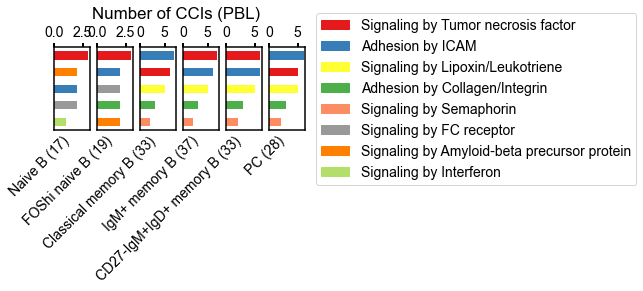

In [22]:
fig, axes = plt.subplots(1, 6, figsize=(4.5, 2))

signaling_order = dF.sum(axis=1).sort_values(ascending=False).index.tolist()
signaling_lst = []
for i, bc in enumerate(pb_b_lst):
    signaling_lst += dF.loc[:,bc].sort_values(ascending=False)[:5].index.tolist()

# order the signaling list
signaling_lst = [x for x in signaling_order if x in signaling_lst]
signaling_lst_pb = signaling_lst

# Plot the barplot
for i, bc in enumerate(pb_b_lst):
    s_lst = dF.loc[:,bc].sort_values(ascending=False)[:5].index.tolist()
    ax = dF.loc[:,bc].sort_values(ascending=False)[:5][::-1].plot.barh(ax=axes[i], color=[ color_dict[x] for x in s_lst][::-1])
    ax.xaxis.set_tick_params(width=2, length=4)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)
    ax.set_yticklabels([""]*5)
    ax.set_xlabel("%s (%d)"%(bc, dF.loc[:,bc].sum()), rotation=45, ha="right")
    ax.set_ylabel("")
    ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False, 
               left=False, labelleft=False, right=False, labelright=False)


from matplotlib.patches import Patch

legend_elements = []
for s in signaling_lst:
    legend_elements += [ Patch(facecolor=color_dict[s], edgecolor=color_dict[s], label=s) ]

# Create the figure
plt.legend(handles=legend_elements, bbox_to_anchor=(1.1, 1, 0.5, 0.5))
fig.suptitle('Number of CCIs (PBL)')
fig.subplots_adjust(top=0.7)

In [23]:
############################################################
#  B cell subpopulation-specific and lineage-specific CCIs
############################################################

In [24]:
# Generate median number of genes captured for each B cell subpopulation
df_meta = pd.read_csv("/path/to/bc.proj.clean.metadata.csv", index_col=0)
median_series = df_meta.groupby("CellTypeGamma")["nFeature_RNA"].median()
median_series

/tmp/ipykernel_46258/3160845401.py:2: DtypeWarning: Columns (7,9,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_meta = pd.read_csv("../../Tables/bc.proj.clean.metadata.20230921.csv", index_col=0)


CellTypeGamma
CD27-IgM+IgD+ memory B    1803.0
Classical memory B        2041.0
Cycling pre B             3296.5
Cycling pro B             3664.0
DZ GC B                   2268.0
FOShi naive B             1449.0
FTLhi immature B          1453.0
HSPA1Ahi naive B           787.0
IgM+ memory B             1747.0
Immature B                 577.0
LZ GC B                   1289.0
Naive B                   1496.0
PB                         548.0
PC                        2820.0
Pre B                     1477.0
Pre-pro B                 1970.0
Pro B                     1630.0
S100A8hi immature B        561.0
Name: nFeature_RNA, dtype: float64

/tmp/ipykernel_46258/2115382478.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_stat2["Count"],


(-0.7, 14.7)

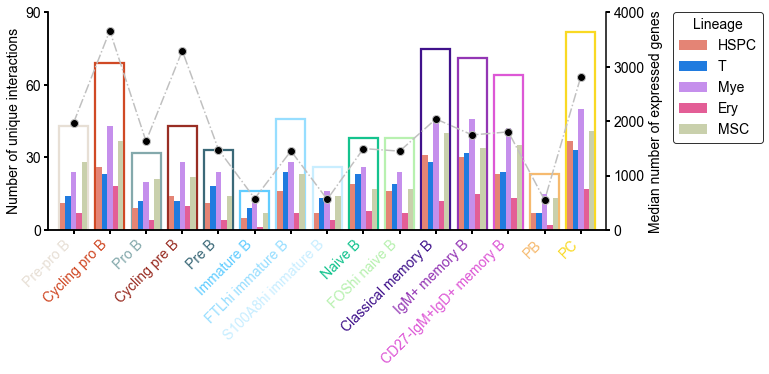

In [25]:
#################################
#    For BM
#################################

df = pd.read_csv("/path/to/EB/statistical_analysis_pvalues_11_21_2023_094654.txt", sep="\t")

def cci_count_cal(bc, nb_lst):
    '''
        Calculate the number of unique interactions between each B cell subset and 
        cell types of a typical lineage
    '''
    nb_lst = [ x for x in nb_lst if x in eb_nb_lst]
    
    cp1 = ["%s|%s"%(bc, x) for x in nb_lst]  # B|non-B
    cp2 = ["%s|%s"%(x, bc) for x in nb_lst]  # non-B|B
    df_temp1 = df[(df.receptor_a==True) & (df.receptor_b==False)]
    df_temp1 = df_temp1[(df_temp1.loc[:,cp1]<0.05).sum(axis=1)>0]
    df_temp2 = df[(df.receptor_a==False) & (df.receptor_b==True)]
    df_temp2 = df_temp2[(df_temp2.loc[:,cp2]<0.05).sum(axis=1)>0]
    df_temp3 = df[(df.directionality=="Adhesion-Adhesion") | df.classification.str.contains("Adhesion")]
    df_temp3 = df_temp3[(df_temp3.loc[:,cp1+cp2]<0.05).sum(axis=1)>0]
    n_temp = len(set(pd.concat([df_temp1,df_temp2, df_temp3])["id_cp_interaction"].tolist()))
    
    return n_temp


bc_lst = []
group_lst = []
cci_count_lst = []

for bc in eb_b_lst:
    for nb_lst, group in zip([hspc_lst, t_lst, mye_lst, ery_lst, msc_lst], ["HSPC", "T", "Mye", "Ery", "MSC"]):
        cci_count = cci_count_cal(bc, nb_lst)
        bc_lst.append(bc)
        group_lst.append(group)
        cci_count_lst.append(cci_count)
df_stat = pd.DataFrame({"BC": bc_lst, "Lineage": group_lst, "Count": cci_count_lst})

cci_count_lst2 = []
for bc in eb_b_lst:
    cci_count = cci_count_cal(bc, eb_nb_lst)
    #bc_lst.append(bc)
    #group_lst.append(group)
    cci_count_lst2.append(cci_count)
df_stat2 = pd.DataFrame({"Count": cci_count_lst2}, index=eb_b_lst)


##############  Plot figure #################
fig, ax = plt.subplots(figsize=(10,4))

colors = rowcolors.loc[eb_b_lst,"CellType"].tolist()

ax = sns.barplot(data=df_stat2["Count"], 
                fill=False, width=0.8, palette=colors, ax=ax)
ax = sns.barplot(data=df_stat, x="BC", y="Count", hue="Lineage", legend=True, order=eb_b_lst, width=0.75, 
                 palette = ["#f67763", "#0079ff", "#c880fb", "#f94892", "#ccd6a6"],
                 ax=ax)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0, 90)
ax.set_yticks(range(0,91,30))

for xtick, color in zip(ax.get_xticklabels(), colors):
    xtick.set_color(color)
#ax.set_xticks(ax.get_xticks(), rotation=45, ha="right")
plt.xticks(rotation=45, ha="right")
plt.legend(bbox_to_anchor=(1.12, 1), loc='upper left', borderaxespad=0, title="Lineage", edgecolor="black")

ax.set_xlabel("")
ax.set_ylabel("Number of unique interactions")

ax2 = ax.twinx()
ax2.plot(median_series[eb_b_lst], '-.o', c="silver", mfc='black', ms=8)
ax2.set_ylim(0,4000)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(1.5)
ax2.xaxis.set_tick_params(width=2, length=4)
ax2.yaxis.set_tick_params(width=2, length=4)
ax2.spines['top'].set_visible(False)
ax2.set_ylabel("Median number of expressed genes")

ax2.set_xlim(0-0.5-0.2,len(eb_b_lst)-0.5+0.2)

/tmp/ipykernel_46258/1822725718.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_stat2["Count"],


(-0.7, 8.7)

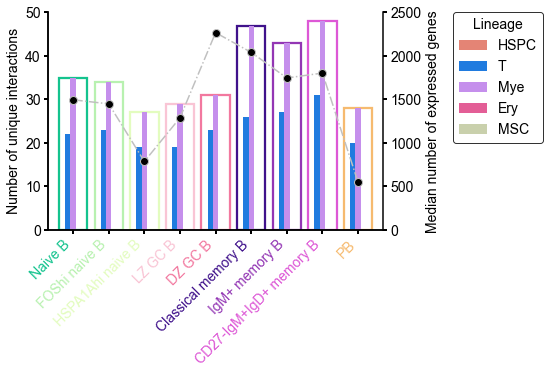

In [26]:
#################################
#    For GC
#################################

df = pd.read_csv("/path/to/GC/statistical_analysis_pvalues_11_20_2023_205114.txt", sep="\t")

def cci_count_cal(bc, nb_lst):
    '''
        Calculate the number of unique interactions between each B cell subset and 
        cell types of a typical lineage
    '''
    nb_lst = [ x for x in nb_lst if x in gc_nb_lst]
    
    cp1 = ["%s|%s"%(bc, x) for x in nb_lst]  # B|non-B
    cp2 = ["%s|%s"%(x, bc) for x in nb_lst]  # non-B|B
    df_temp1 = df[(df.receptor_a==True) & (df.receptor_b==False)]
    df_temp1 = df_temp1[(df_temp1.loc[:,cp1]<0.05).sum(axis=1)>0]
    df_temp2 = df[(df.receptor_a==False) & (df.receptor_b==True)]
    df_temp2 = df_temp2[(df_temp2.loc[:,cp2]<0.05).sum(axis=1)>0]
    df_temp3 = df[(df.directionality=="Adhesion-Adhesion") | df.classification.str.contains("Adhesion")]
    df_temp3 = df_temp3[(df_temp3.loc[:,cp1+cp2]<0.05).sum(axis=1)>0]
    n_temp = len(set(pd.concat([df_temp1,df_temp2, df_temp3])["id_cp_interaction"].tolist()))
    
    return n_temp

bc_lst = []
group_lst = []
cci_count_lst = []

for bc in gc_b_lst:
    for nb_lst, group in zip([hspc_lst, t_lst, mye_lst, ery_lst, msc_lst], ["HSPC", "T", "Mye", "Ery", "MSC"]):
        cci_count = cci_count_cal(bc, nb_lst)
        bc_lst.append(bc)
        group_lst.append(group)
        cci_count_lst.append(cci_count)
df_stat = pd.DataFrame({"BC": bc_lst, "Lineage": group_lst, "Count": cci_count_lst})

cci_count_lst2 = []
for bc in gc_b_lst:
    cci_count = cci_count_cal(bc, gc_nb_lst)
    #bc_lst.append(bc)
    #group_lst.append(group)
    cci_count_lst2.append(cci_count)
df_stat2 = pd.DataFrame({"Count": cci_count_lst2}, index=gc_b_lst)


##############  Plot figure #################
fig, ax = plt.subplots(figsize=(6,4))

colors = rowcolors.loc[gc_b_lst,"CellType"].tolist()

ax = sns.barplot(data=df_stat2["Count"], 
                fill=False, width=0.8, palette=colors, ax=ax)
ax = sns.barplot(data=df_stat, x="BC", y="Count", hue="Lineage", legend=True, order=gc_b_lst, width=0.75, 
                 palette = ["#f67763", "#0079ff", "#c880fb", "#f94892", "#ccd6a6"],
                 ax=ax)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0, 50)
#ax.set_yticks(range(0,76,25))

for xtick, color in zip(ax.get_xticklabels(), colors):
    xtick.set_color(color)
#ax.set_xticks(ax.get_xticks(), rotation=45, ha="right")
plt.xticks(rotation=45, ha="right")
plt.legend(bbox_to_anchor=(1.21, 1), loc='upper left', borderaxespad=0, title="Lineage", edgecolor="black")

ax.set_xlabel("")
ax.set_ylabel("Number of unique interactions")

ax2 = ax.twinx()
ax2.plot(median_series[gc_b_lst], '-.o', c="silver", mfc='black', ms=8)
ax2.set_ylim(0,2500)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(1.5)
ax2.xaxis.set_tick_params(width=2, length=4)
ax2.yaxis.set_tick_params(width=2, length=4)
ax2.spines['top'].set_visible(False)
ax2.set_ylabel("Median number of expressed genes")

ax2.set_xlim(0-0.5-0.2,len(gc_b_lst)-0.5+0.2)

/tmp/ipykernel_46258/3254335710.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_stat2["Count"],


(-0.7, 5.7)

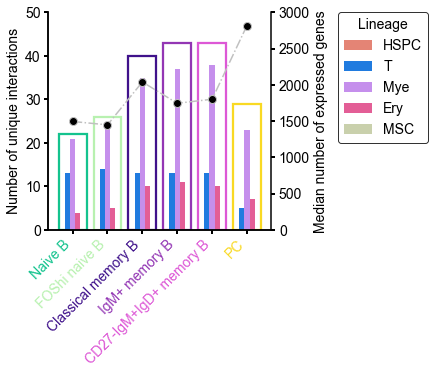

In [27]:
#################################
#    For PBMC
#################################

df = pd.read_csv("/path/to/PBMC/statistical_analysis_pvalues_11_20_2023_202338.txt", sep="\t")

def cci_count_cal(bc, nb_lst):
    '''
        Calculate the number of unique interactions between each B cell subset and 
        cell types of a typical lineage
    '''
    nb_lst = [ x for x in nb_lst if x in pb_nb_lst]
    
    cp1 = ["%s|%s"%(bc, x) for x in nb_lst]  # B|non-B
    cp2 = ["%s|%s"%(x, bc) for x in nb_lst]  # non-B|B
    df_temp1 = df[(df.receptor_a==True) & (df.receptor_b==False)]
    df_temp1 = df_temp1[(df_temp1.loc[:,cp1]<0.05).sum(axis=1)>0]
    df_temp2 = df[(df.receptor_a==False) & (df.receptor_b==True)]
    df_temp2 = df_temp2[(df_temp2.loc[:,cp2]<0.05).sum(axis=1)>0]
    df_temp3 = df[(df.directionality=="Adhesion-Adhesion") | df.classification.str.contains("Adhesion")]
    df_temp3 = df_temp3[(df_temp3.loc[:,cp1+cp2]<0.05).sum(axis=1)>0]
    n_temp = len(set(pd.concat([df_temp1,df_temp2, df_temp3])["id_cp_interaction"].tolist()))
    
    return n_temp


bc_lst = []
group_lst = []
cci_count_lst = []

for bc in pb_b_lst:
    for nb_lst, group in zip([hspc_lst, t_lst, mye_lst, ery_lst, msc_lst], ["HSPC", "T", "Mye", "Ery", "MSC"]):
        cci_count = cci_count_cal(bc, nb_lst)
        bc_lst.append(bc)
        group_lst.append(group)
        cci_count_lst.append(cci_count)
df_stat = pd.DataFrame({"BC": bc_lst, "Lineage": group_lst, "Count": cci_count_lst})


cci_count_lst2 = []
for bc in pb_b_lst:
    cci_count = cci_count_cal(bc, pb_nb_lst)
    cci_count_lst2.append(cci_count)
df_stat2 = pd.DataFrame({"Count": cci_count_lst2}, index=pb_b_lst)


##############  Plot figure #################
fig, ax = plt.subplots(figsize=(4,4))

colors = rowcolors.loc[pb_b_lst,"CellType"].tolist()

ax = sns.barplot(data=df_stat2["Count"], 
                fill=False, width=0.8, palette=colors, ax=ax)
ax = sns.barplot(data=df_stat, x="BC", y="Count", hue="Lineage", legend=True, order=pb_b_lst, width=0.75, 
                 palette = ["#f67763", "#0079ff", "#c880fb", "#f94892", "#ccd6a6"],
                 ax=ax)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0, 50)

for xtick, color in zip(ax.get_xticklabels(), colors):
    xtick.set_color(color)
#ax.set_xticks(ax.get_xticks(), rotation=45, ha="right")
plt.xticks(rotation=45, ha="right")
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper left', borderaxespad=0, title="Lineage", edgecolor="black")

ax.set_xlabel("")
ax.set_ylabel("Number of unique interactions")

ax2 = ax.twinx()
ax2.plot(median_series[pb_b_lst], '-.o', c="silver", mfc='black', ms=8)
ax2.set_ylim(0,3000)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(1.5)
ax2.xaxis.set_tick_params(width=2, length=4)
ax2.yaxis.set_tick_params(width=2, length=4)
ax2.spines['top'].set_visible(False)
ax2.set_ylabel("Median number of expressed genes")

ax2.set_xlim(0-0.5-0.2,len(pb_b_lst)-0.5+0.2)


In [28]:
############################################################
#  Lineage-specific CCIs in three different tissue sources
############################################################

In [29]:
#################################
#    For BM
#################################

df = pd.read_csv("/path/to/EB/statistical_analysis_pvalues_11_21_2023_094654.txt", sep="\t")

def signaling_count_for_lineage(nb_lst):
    
    nb_lst = [ x for x in nb_lst if x in eb_nb_lst]
    
    cp1 = ["%s|%s"%(x, y) for x in eb_b_lst for y in nb_lst]
    cp2 = ["%s|%s"%(y, x) for x in eb_b_lst for y in nb_lst]
    df_temp1 = df[(df.receptor_a==True) & (df.receptor_b==False)]
    df_temp1 = df_temp1[(df_temp1.loc[:,cp1]<0.05).sum(axis=1)>0]
    df_temp2 = df[(df.receptor_a==False) & (df.receptor_b==True)]
    df_temp2 = df_temp2[(df_temp2.loc[:,cp2]<0.05).sum(axis=1)>0]
    df_temp3 = df[(df.directionality=="Adhesion-Adhesion") | df.classification.str.contains("Adhesion")]
    df_temp3 = df_temp3[(df_temp3.loc[:,cp1+cp2]<0.05).sum(axis=1)>0]
    
    #signaling_count = pd.concat([df_temp1,df_temp2, df_temp3]).drop_duplicates()["classification"].fillna("Missing").value_counts()
    signaling_count = pd.concat([df_temp1,df_temp2, df_temp3]).drop_duplicates()["classification"].dropna().value_counts()
    
    return signaling_count

for i, (nb_lst, group) in enumerate(zip([hspc_lst, t_lst, mye_lst, ery_lst, msc_lst], ["HSPC", "T", "Mye", "Ery", "MSC"])):
    df_temp = signaling_count_for_lineage(nb_lst).rename(group).to_frame()
    if i == 0:
        dF = df_temp
    else:
        dF = pd.concat([dF, df_temp], axis=1)

dF = dF.fillna(0).astype("int")

# Reorder the signaling 
lineage_count = (dF>0).sum(axis=1)
non_specific_signaling_lst = lineage_count[lineage_count>1].index.tolist()
non_specific_signaling_lst = dF.loc[non_specific_signaling_lst].sum(axis=1).sort_values(ascending=False).index.tolist()

hspc_specific_signaling_lst = dF[dF.sum(axis=1)==dF["HSPC"]].sort_values("HSPC", ascending=False).index.tolist()
t_specific_signaling_lst = dF[dF.sum(axis=1)==dF["T"]].sort_values("T", ascending=False).index.tolist()
mye_specific_signaling_lst = dF[dF.sum(axis=1)==dF["Mye"]].sort_values("Mye", ascending=False).index.tolist()
ery_specific_signaling_lst = dF[dF.sum(axis=1)==dF["Ery"]].sort_values("Ery", ascending=False).index.tolist()
msc_specific_signaling_lst = dF[dF.sum(axis=1)==dF["MSC"]].sort_values("MSC", ascending=False).index.tolist()
lineage_specific_signaling = hspc_specific_signaling_lst + t_specific_signaling_lst + mye_specific_signaling_lst + ery_specific_signaling_lst + msc_specific_signaling_lst

signaling_order = non_specific_signaling_lst + lineage_specific_signaling

dF = dF.loc[signaling_order]
dF["X"] = range(dF.shape[0])
dF

,HSPC,T,Mye,Ery,MSC,X
Signaling by Tumor necrosis factor,9,5,12,1,8,0
Adhesion by ICAM,8,8,8,3,6,1
Signaling by Prostaglandin,4,4,4,4,4,2
Signaling by Amyloid-beta precursor protein,3,3,3,3,3,3
Signaling by Dehydroepiandrosterone,3,3,3,2,1,4
Adhesion by Collagen/Integrin,2,0,0,0,9,5
Adhesion by JAM,4,1,1,2,2,6
Signaling by Galectin,1,2,2,2,2,7
Signaling by Lipoxin/Leukotriene,2,1,4,1,0,8
Signaling by Cholesterol/Desmosterol,3,2,2,0,0,9


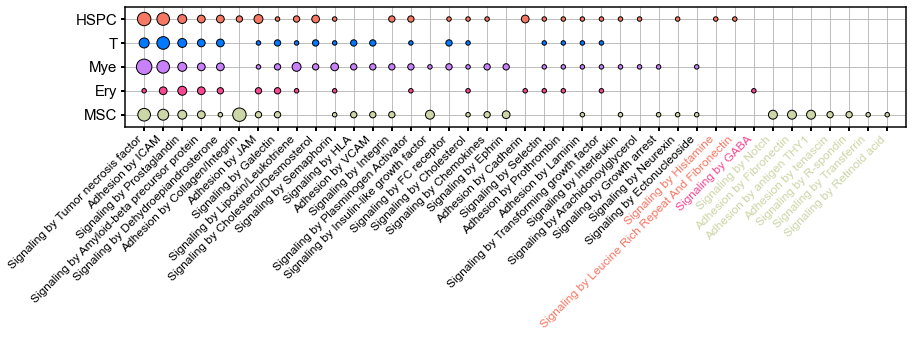

In [30]:
fig, ax = plt.subplots(figsize=(14,2.2))

size_factor = 20
edgecolor = "black"
alpha = 0.6
ax.grid(zorder=0)
colors = ["#f67763", "#0079ff", "#c880fb", "#f94892", "#ccd6a6"]


#####################################################
#             Frequent signaling plot
#####################################################
for y, lineage in enumerate(["HSPC", "T", "Mye", "Ery", "MSC"]):
    df_temp = dF[dF[lineage]>0][[lineage, 'X']]
    size_lst = [x*size_factor for x in df_temp[lineage]]
    xs = df_temp["X"].tolist()
    ys = [4-y] * len(size_lst)
    ax.scatter(xs, ys, size_lst, color=colors[y], zorder=2, edgecolor=edgecolor)


ax.set_ylim(-0.5,4.5)
ax.set_yticks([0,1,2,3,4], ["HSPC", "T", "Mye", "Ery", "MSC"][::-1], fontsize=15)
ax.set_xticks(range(dF.shape[0]), signaling_order, rotation=45, ha="right", fontsize=12)
ax.set_xlim(-1, 40)


#####################################################
#                   Aesthetics
#####################################################
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)

colors = ["black"] * len(non_specific_signaling_lst) + ["#f67763"] * len(hspc_specific_signaling_lst) \
+ ["#0079ff"] * len(t_specific_signaling_lst) + ["#c880fb"] * len(mye_specific_signaling_lst) \
+ ["#f94892"] * len(ery_specific_signaling_lst) + ["#ccd6a6"] * len(msc_specific_signaling_lst)

for i, (xtick, color) in enumerate(zip(ax.get_xticklabels(), colors)):
    xtick.set_color(color)

In [31]:
#################################
#    For GC
#################################

df = pd.read_csv("/path/to/GC/statistical_analysis_pvalues_11_20_2023_205114.txt", sep="\t")

def signaling_count_for_lineage(nb_lst):
    
    nb_lst = [ x for x in nb_lst if x in gc_nb_lst]
    
    cp1 = ["%s|%s"%(x, y) for x in gc_b_lst for y in nb_lst]
    cp2 = ["%s|%s"%(y, x) for x in gc_b_lst for y in nb_lst]
    df_temp1 = df[(df.receptor_a==True) & (df.receptor_b==False)]
    df_temp1 = df_temp1[(df_temp1.loc[:,cp1]<0.05).sum(axis=1)>0]
    df_temp2 = df[(df.receptor_a==False) & (df.receptor_b==True)]
    df_temp2 = df_temp2[(df_temp2.loc[:,cp2]<0.05).sum(axis=1)>0]
    df_temp3 = df[(df.directionality=="Adhesion-Adhesion") | df.classification.str.contains("Adhesion")]
    df_temp3 = df_temp3[(df_temp3.loc[:,cp1+cp2]<0.05).sum(axis=1)>0]
    
    #signaling_count = pd.concat([df_temp1,df_temp2, df_temp3]).drop_duplicates()["classification"].fillna("Missing").value_counts()
    signaling_count = pd.concat([df_temp1,df_temp2, df_temp3]).drop_duplicates()["classification"].dropna().value_counts()
    
    return signaling_count

for i, (nb_lst, group) in enumerate(zip([t_lst, mye_lst], [ "T", "Mye"])):
    df_temp = signaling_count_for_lineage(nb_lst).rename(group).to_frame()
    if i == 0:
        dF = df_temp
    else:
        dF = pd.concat([dF, df_temp], axis=1)

dF = dF.fillna(0).astype("int")

# Reorder the signaling 
lineage_count = (dF>0).sum(axis=1)
non_specific_signaling_lst = lineage_count[lineage_count>1].index.tolist()
non_specific_signaling_lst = dF.loc[non_specific_signaling_lst].sum(axis=1).sort_values(ascending=False).index.tolist()

#hspc_specific_signaling_lst = dF[dF.sum(axis=1)==dF["HSPC"]].sort_values("HSPC", ascending=False).index.tolist()
t_specific_signaling_lst = dF[dF.sum(axis=1)==dF["T"]].sort_values("T", ascending=False).index.tolist()
mye_specific_signaling_lst = dF[dF.sum(axis=1)==dF["Mye"]].sort_values("Mye", ascending=False).index.tolist()
#ery_specific_signaling_lst = dF[dF.sum(axis=1)==dF["Ery"]].sort_values("Ery", ascending=False).index.tolist()
#msc_specific_signaling_lst = dF[dF.sum(axis=1)==dF["MSC"]].sort_values("MSC", ascending=False).index.tolist()
lineage_specific_signaling = t_specific_signaling_lst + mye_specific_signaling_lst

signaling_order = non_specific_signaling_lst + lineage_specific_signaling

dF = dF.loc[signaling_order]
dF["X"] = range(dF.shape[0])
dF

,T,Mye,X
Signaling by Tumor necrosis factor,7,10,0
Adhesion by ICAM,6,7,1
Adhesion by Collagen/Integrin,5,5,2
Signaling by Chemokines,3,6,3
Signaling by Interleukin,2,3,4
Signaling by Amyloid-beta precursor protein,2,2,5
Signaling by FC receptor,1,2,6
Signaling by Semaphorin,1,2,7
Signaling by Prostaglandin,1,2,8
Signaling by Selectin,1,1,9


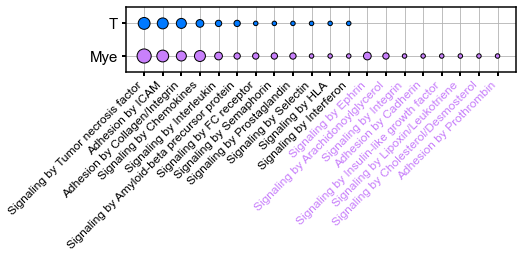

In [32]:
fig, ax = plt.subplots(figsize=(7,1.2))

size_factor = 20
edgecolor = "black"
alpha = 0.6
ax.grid(zorder=0)
colors = ["#0079ff", "#c880fb"]


#####################################################
#             Frequent signaling plot
#####################################################
for y, lineage in enumerate(["T", "Mye"]):
    df_temp = dF[dF[lineage]>0][[lineage, 'X']]
    size_lst = [x*size_factor for x in df_temp[lineage]]
    xs = df_temp["X"].tolist()
    ys = [1-y] * len(size_lst)
    ax.scatter(xs, ys, size_lst, color=colors[y], zorder=2, edgecolor=edgecolor)


ax.set_ylim(-0.5,1.5)
ax.set_yticks([0,1], ["T", "Mye"][::-1], fontsize=15)
ax.set_xticks(range(dF.shape[0]), signaling_order, rotation=45, ha="right", fontsize=12)
ax.set_xlim(-1, dF.shape[0])


#####################################################
#                   Aesthetics
#####################################################
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)

colors = ["black"] * len(non_specific_signaling_lst) \
+ ["#0079ff"] * len(t_specific_signaling_lst) + ["#c880fb"] * len(mye_specific_signaling_lst)


for i, (xtick, color) in enumerate(zip(ax.get_xticklabels(), colors)):
    xtick.set_color(color)

In [33]:
#################################
#    For PBMC
#################################

df = pd.read_csv("/path/to/PBMC/statistical_analysis_pvalues_11_20_2023_202338.txt", sep="\t")

def signaling_count_for_lineage(nb_lst):
    
    nb_lst = [ x for x in nb_lst if x in pb_nb_lst]
    
    cp1 = ["%s|%s"%(x, y) for x in pb_b_lst for y in nb_lst]
    cp2 = ["%s|%s"%(y, x) for x in pb_b_lst for y in nb_lst]
    df_temp1 = df[(df.receptor_a==True) & (df.receptor_b==False)]
    df_temp1 = df_temp1[(df_temp1.loc[:,cp1]<0.05).sum(axis=1)>0]
    df_temp2 = df[(df.receptor_a==False) & (df.receptor_b==True)]
    df_temp2 = df_temp2[(df_temp2.loc[:,cp2]<0.05).sum(axis=1)>0]
    df_temp3 = df[(df.directionality=="Adhesion-Adhesion") | df.classification.str.contains("Adhesion")]
    df_temp3 = df_temp3[(df_temp3.loc[:,cp1+cp2]<0.05).sum(axis=1)>0]
    
    #signaling_count = pd.concat([df_temp1,df_temp2, df_temp3]).drop_duplicates()["classification"].fillna("Missing").value_counts()
    signaling_count = pd.concat([df_temp1,df_temp2, df_temp3]).drop_duplicates()["classification"].dropna().value_counts()
    
    return signaling_count

for i, (nb_lst, group) in enumerate(zip([t_lst, mye_lst, ery_lst], ["T", "Mye", "Ery"])):
    df_temp = signaling_count_for_lineage(nb_lst).rename(group).to_frame()
    if i == 0:
        dF = df_temp
    else:
        dF = pd.concat([dF, df_temp], axis=1)

dF = dF.fillna(0).astype("int")

# Reorder the signaling 
lineage_count = (dF>0).sum(axis=1)
non_specific_signaling_lst = lineage_count[lineage_count>1].index.tolist()
non_specific_signaling_lst = dF.loc[non_specific_signaling_lst].sum(axis=1).sort_values(ascending=False).index.tolist()

t_specific_signaling_lst = dF[dF.sum(axis=1)==dF["T"]].sort_values("T", ascending=False).index.tolist()
mye_specific_signaling_lst = dF[dF.sum(axis=1)==dF["Mye"]].sort_values("Mye", ascending=False).index.tolist()
ery_specific_signaling_lst = dF[dF.sum(axis=1)==dF["Ery"]].sort_values("Ery", ascending=False).index.tolist()
lineage_specific_signaling = t_specific_signaling_lst + mye_specific_signaling_lst + ery_specific_signaling_lst

signaling_order = non_specific_signaling_lst + lineage_specific_signaling

dF = dF.loc[signaling_order]
dF["X"] = range(dF.shape[0])
dF

,T,Mye,Ery,X
Adhesion by ICAM,2,8,1,0
Signaling by Tumor necrosis factor,1,9,0,1
Signaling by Lipoxin/Leukotriene,0,4,1,2
Signaling by FC receptor,2,2,0,3
Signaling by HLA,2,2,0,4
Adhesion by JAM,1,1,2,5
Signaling by Amyloid-beta precursor protein,0,2,2,6
Signaling by Semaphorin,1,2,0,7
Signaling by Interferon,1,1,0,8
Signaling by Prostaglandin,1,1,0,9


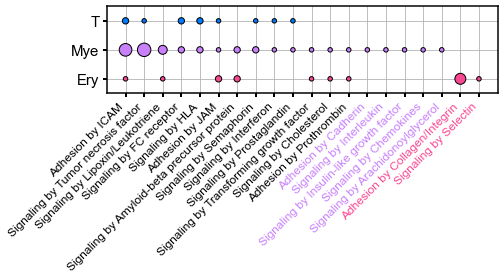

In [34]:
fig, ax = plt.subplots(figsize=(7,1.6))

size_factor = 20
edgecolor = "black"
alpha = 0.6
ax.grid(zorder=0)
colors = ["#0079ff", "#c880fb", "#f94892"]


#####################################################
#             Frequent signaling plot
#####################################################
for y, lineage in enumerate(["T", "Mye", "Ery"]):
    df_temp = dF[dF[lineage]>0][[lineage, 'X']]
    size_lst = [x*size_factor for x in df_temp[lineage]]
    xs = df_temp["X"].tolist()
    ys = [2-y] * len(size_lst)
    ax.scatter(xs, ys, size_lst, color=colors[y], zorder=2, edgecolor=edgecolor)


ax.set_ylim(-0.5,2.5)
ax.set_yticks([0,1,2], ["T", "Mye", "Ery"][::-1], fontsize=15)
ax.set_xticks(range(dF.shape[0]), signaling_order, rotation=45, ha="right", fontsize=12)
ax.set_xlim(-1, dF.shape[0])


#####################################################
#                   Aesthetics
#####################################################
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)

colors = ["black"] * len(non_specific_signaling_lst) \
+ ["#0079ff"] * len(t_specific_signaling_lst) + ["#c880fb"] * len(mye_specific_signaling_lst) \
+ ["#f94892"] * len(ery_specific_signaling_lst)

for i, (xtick, color) in enumerate(zip(ax.get_xticklabels(), colors)):
    xtick.set_color(color)